# 파일 읽어들이기 및 형태소 분석 열 추가

In [1]:

from konlpy.tag import Mecab

# 불용어 지정
def get_stopWords():
    # 불용어 파일 경로 확인-------------------------------------------------------------------------------------------------------------------
    stop_words = open("/home/joe/amr_ws/eda/data/koreanStopwords.txt", "r")
    lines = stop_words.readlines()
    stop_word = []
    for line in lines:
        line = line.replace("\n", "")
        stop_word.append(line)
    stop_words.close()
    return stop_word

# mecab 모듈을 이용 형태소로 분리 후 형태소가 한 글자이거나 불용어 리스트에 해당된다면 삭제
def get_tokenized_article(refined_article):
    stop_words = get_stopWords()
    m = Mecab()
    tokenized = []

    for row in refined_article:
        inner = []
        row = str(row)
        text = m.morphs(row)
        
        for word in text:
            
            if (len(word) == 1) or (word in stop_words):
                pass
            else:
                inner.append(word)

        tokenized.append(inner)
    
    return tokenized

# 형태소 분리한 제목과 기사내용 열을 새롭게 추가
import pandas as pd
df=pd.read_csv("../../data/eda_project/robot_2023.csv")
df["tokenized_text"] = get_tokenized_article(df["text"])
df["tokenized_title"] = get_tokenized_article(df["title"])


df

,date,title,text,tokenized_text,tokenized_title
0,2023-01-01 00:05:03,퇴근 않는 로봇 이길 수 있겠어요 당신의 미래 생존법,인터뷰 빅데이터 분석가 송길영 바이브컴퍼니 부사장 2023년 키워드는 변화의 가속...,"[인터뷰, 데이터, 분석가, 송길영, 바이브, 컴퍼니, 부사장, 키워드, 변화, 가...","[퇴근, 로봇, 이길, 미래, 생존]"
1,2023-01-01 02:17:50,돌아온 토종 로봇 만화 손자 또래 독자도 본다,앵커 45년 전 소년들의 마음을 설레게 했던 토종 만화 로보트 킹 이 다시 돌아왔...,"[앵커, 45, 소년, 마음, 설레, 토종, 만화, 로보트, 돌아왔, 추억, 만화,...","[돌아온, 토종, 로봇, 만화, 손자, 또래, 독자, 본다]"
2,2023-01-01 20:03:01,마산로봇랜드 3년째 취약계층을 위한 기부금 전달,연말연시 맞아 로봇랜드 임직원 일동 기부금 모금해 마산애육원에 전달 마산로봇랜드 제...,"[연말연시, 로봇, 랜드, 임직원, 일동, 기부금, 모금, 마산, 전달, 마산, 로...","[마산, 로봇, 랜드, 취약, 계층, 기부금, 전달]"
3,2023-01-01 10:51:15,올해 자산 배분 중요성 커져 신재생에너지 로봇 ETF 주목,경기침체 상황 속 기업 옥석 가리기 시작 기준금리 인상이 중단되고 경기침체가 본격...,"[경기, 침체, 상황, 옥석, 가리, 시작, 기준, 금리, 인상, 중단, 경기, 침...","[자산, 배분, 중요, 커져, 신재, 에너지, 로봇, ETF, 주목]"
4,2023-01-01 06:10:21,과학 한스푼 깜놀 대형 벌레인 줄 벽 천장 종횡무진 로봇 등장,수직면에서 속도 최대 70 s 천장에선 50 s 자석 이용 발바닥에 고무 적용해 미...,"[수직면, 속도, 70, 천장, 에선, 50, 자석, 이용, 발바닥, 고무, 적용,...","[과학, 스푼, 깜놀, 대형, 벌레, 천장, 종횡, 무진, 로봇, 등장]"
...,...,...,...,...,...
9333,2023-12-27 05:30:02,교육이 미래다 햅틱스부터 로봇 분야까지 혁신적 융합연구로 미래기술 선도,상상을 현실로 바꾸는 융합연구 한국기술교육대 김상연 교수 성과 업적 시각장애인 길 ...,"[상상, 현실, 바꾸, 융합, 한국, 교육대, 김상연, 교수, 성과, 업적, 장애,...","[교육, 미래, 햅틱스, 로봇, 혁신, 융합, 미래, 선도]"
9334,2023-12-30 03:02:02,비행기 조종석서 엄지 척 세계 첫 로봇조종사,세계 첫 휴머노이드 파일럿 2026년엔 비행기 조종 장련성 기자 지난 22일 심현철...,"[세계, 휴머노이드, 파일럿, 2026, 비행기, 조종, 22, 심현철, KAIST...","[비행기, 조종석, 엄지, 세계, 로봇, 조종사]"
9335,2023-12-26 11:22:17,허경수 코스모 회장 로봇사업 지휘 2025년 상장,서울 뉴시스 허경수 코스모그룹 회장 2023 11 27 photo newsis c...,"[뉴시스, 허경수, 코스모, 그룹, 회장, 11, 27, photo, newsis,...","[허경수, 코스모, 회장, 로봇, 지휘, 2025, 상장]"
9336,2023-12-26 18:18:08,30kg 드는 협동로봇 산업서 수요 과도 협력 기대,킴 포블슨 유니버설 로봇 CEO 서면인터뷰 최근 UR30 공개 내년 6월 양산 돌입...,"[포블, 유니버설, 로봇, CEO, 서면, 인터뷰, 최근, UR, 30, 공개, 내...","[30, kg, 협동, 로봇, 수요, 과도, 협력, 기대]"


# 1. 특정 산업 별 분석
---
## 임의의 라벨링 지정 및 월별, 일별로 구분한 열 추가

In [2]:
# 임의의 라벨링 지정 및 월별, 일별로 구분한 열 추가
import numpy as np
label = []
for i in range(len(df["date"])):
    label.append(np.random.randint(0, 2))
df["hojae"] = label

df.loc[(df["hojae"]==0), "hojae"] = int(-1)

# datetime으로 변환
df['date'] = pd.to_datetime(df['date'])

# 새로운 열을 만들어 일(day), 월(month) 단위로 쪼갬
df['date_day'] = df['date'].dt.date
df['date_month'] = df['date'].dt.to_period('M')

df

,date,title,text,tokenized_text,tokenized_title,hojae,date_day,date_month
0,2023-01-01 00:05:03,퇴근 않는 로봇 이길 수 있겠어요 당신의 미래 생존법,인터뷰 빅데이터 분석가 송길영 바이브컴퍼니 부사장 2023년 키워드는 변화의 가속...,"[인터뷰, 데이터, 분석가, 송길영, 바이브, 컴퍼니, 부사장, 키워드, 변화, 가...","[퇴근, 로봇, 이길, 미래, 생존]",-1,2023-01-01,2023-01
1,2023-01-01 02:17:50,돌아온 토종 로봇 만화 손자 또래 독자도 본다,앵커 45년 전 소년들의 마음을 설레게 했던 토종 만화 로보트 킹 이 다시 돌아왔...,"[앵커, 45, 소년, 마음, 설레, 토종, 만화, 로보트, 돌아왔, 추억, 만화,...","[돌아온, 토종, 로봇, 만화, 손자, 또래, 독자, 본다]",1,2023-01-01,2023-01
2,2023-01-01 20:03:01,마산로봇랜드 3년째 취약계층을 위한 기부금 전달,연말연시 맞아 로봇랜드 임직원 일동 기부금 모금해 마산애육원에 전달 마산로봇랜드 제...,"[연말연시, 로봇, 랜드, 임직원, 일동, 기부금, 모금, 마산, 전달, 마산, 로...","[마산, 로봇, 랜드, 취약, 계층, 기부금, 전달]",1,2023-01-01,2023-01
3,2023-01-01 10:51:15,올해 자산 배분 중요성 커져 신재생에너지 로봇 ETF 주목,경기침체 상황 속 기업 옥석 가리기 시작 기준금리 인상이 중단되고 경기침체가 본격...,"[경기, 침체, 상황, 옥석, 가리, 시작, 기준, 금리, 인상, 중단, 경기, 침...","[자산, 배분, 중요, 커져, 신재, 에너지, 로봇, ETF, 주목]",1,2023-01-01,2023-01
4,2023-01-01 06:10:21,과학 한스푼 깜놀 대형 벌레인 줄 벽 천장 종횡무진 로봇 등장,수직면에서 속도 최대 70 s 천장에선 50 s 자석 이용 발바닥에 고무 적용해 미...,"[수직면, 속도, 70, 천장, 에선, 50, 자석, 이용, 발바닥, 고무, 적용,...","[과학, 스푼, 깜놀, 대형, 벌레, 천장, 종횡, 무진, 로봇, 등장]",-1,2023-01-01,2023-01
...,...,...,...,...,...,...,...,...
9333,2023-12-27 05:30:02,교육이 미래다 햅틱스부터 로봇 분야까지 혁신적 융합연구로 미래기술 선도,상상을 현실로 바꾸는 융합연구 한국기술교육대 김상연 교수 성과 업적 시각장애인 길 ...,"[상상, 현실, 바꾸, 융합, 한국, 교육대, 김상연, 교수, 성과, 업적, 장애,...","[교육, 미래, 햅틱스, 로봇, 혁신, 융합, 미래, 선도]",1,2023-12-27,2023-12
9334,2023-12-30 03:02:02,비행기 조종석서 엄지 척 세계 첫 로봇조종사,세계 첫 휴머노이드 파일럿 2026년엔 비행기 조종 장련성 기자 지난 22일 심현철...,"[세계, 휴머노이드, 파일럿, 2026, 비행기, 조종, 22, 심현철, KAIST...","[비행기, 조종석, 엄지, 세계, 로봇, 조종사]",1,2023-12-30,2023-12
9335,2023-12-26 11:22:17,허경수 코스모 회장 로봇사업 지휘 2025년 상장,서울 뉴시스 허경수 코스모그룹 회장 2023 11 27 photo newsis c...,"[뉴시스, 허경수, 코스모, 그룹, 회장, 11, 27, photo, newsis,...","[허경수, 코스모, 회장, 로봇, 지휘, 2025, 상장]",-1,2023-12-26,2023-12
9336,2023-12-26 18:18:08,30kg 드는 협동로봇 산업서 수요 과도 협력 기대,킴 포블슨 유니버설 로봇 CEO 서면인터뷰 최근 UR30 공개 내년 6월 양산 돌입...,"[포블, 유니버설, 로봇, CEO, 서면, 인터뷰, 최근, UR, 30, 공개, 내...","[30, kg, 협동, 로봇, 수요, 과도, 협력, 기대]",-1,2023-12-26,2023-12


## 2023년 로봇 분야 키워드를 뽑기 위한 워드 클라우드 시각화
### 2023 전체, 월별 키워드 추출

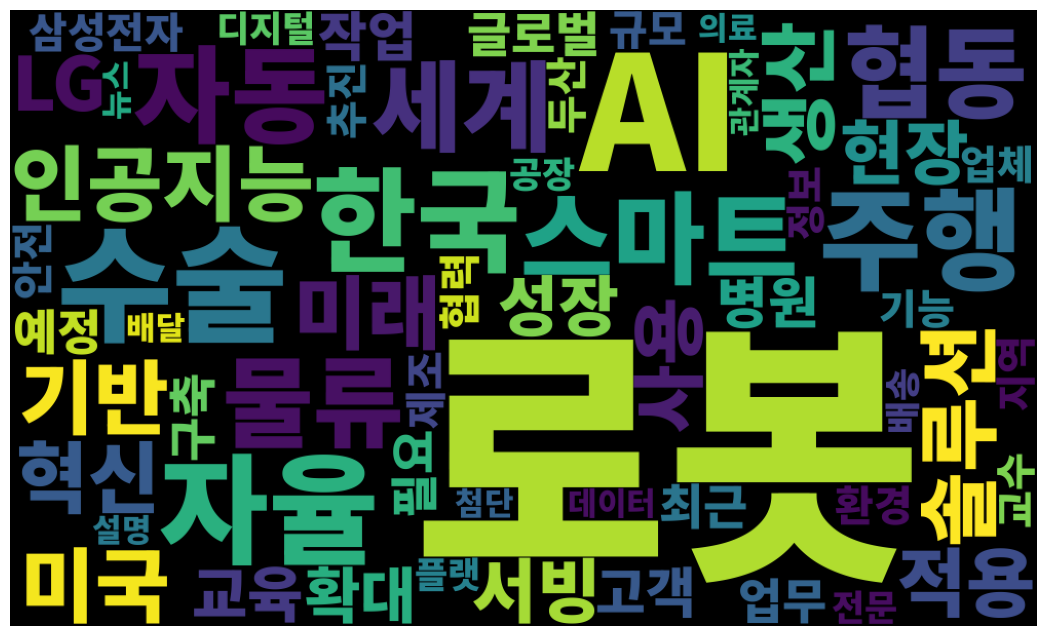

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np



# 전체 키워드 추출 후 리스트에 리스트 형태로 저장
total_keyward = []
monthly_keyward = []
for  i, b in df.iterrows():
    total_keyward.extend(b["tokenized_text"])
counts = Counter(total_keyward)
tags = counts.most_common(60)


# 월 별로 키워드 추출 후 리스트에 리스트 형태로 저장    
month_list = df["date_month"].unique()


for month in month_list:
    inner = []
    monthly_data = df.loc[df["date_month"]==month]
    
    for i, row in monthly_data.iterrows():
        inner.extend(row["tokenized_text"])
        
    count = Counter(inner)
    monthly_keyward.append(count.most_common())



# 전체 키워드에 대해 워드 클라우드 그래프 그리기
wc = WordCloud(font_path = "/home/joe/amr_ws/eda/document/Noto_Sans_KR/static/NotoSansKR-Black.ttf",
               background_color = "black",
               height = 600,
               width = 1000
               )

cloud = wc.generate_from_frequencies(dict(tags))

cloud.to_file("test.jpg")

plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(cloud)
plt.show()

## 월별 키워드 분포

/tmp/ipykernel_11152/4119266904.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yy[i-1], y=xx[i-1], orient="h", ax=ax, palette="muted")
/tmp/ipykernel_11152/4119266904.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yy[i-1], y=xx[i-1], orient="h", ax=ax, palette="muted")
/tmp/ipykernel_11152/4119266904.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yy[i-1], y=xx[i-1], orient="h", ax=ax, palette="muted")
/tmp/ipykernel_11152/4119266904.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

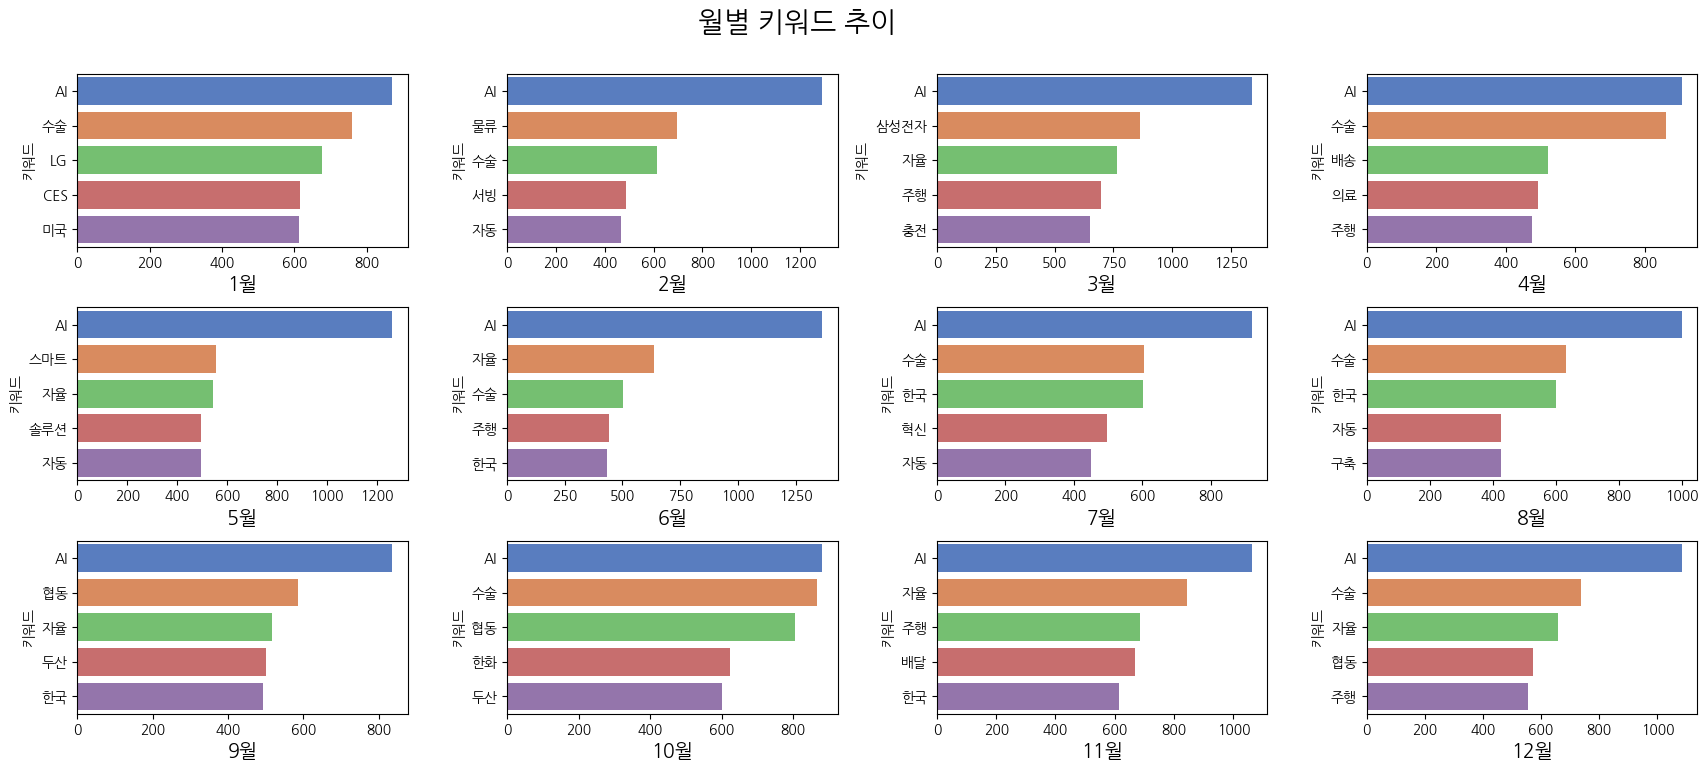

In [4]:
def draw_topic(index):
    # 3행 4열의 subplot 생성
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 8))
    plt.subplots_adjust(left=0.1, bottom=0.1,  right=1, top=0.9, wspace=0.3, hspace=0.35)
   
    # subplot에 데이터 플롯
    for i, ax in enumerate(axes.flatten(), start=1):
        sns.barplot(x=yy[i-1], y=xx[i-1], orient="h", ax=ax, palette="muted")
        ax.set_ylabel("키워드")
        ax.set_xlabel(f'{i}월', fontdict={"size": 14})

    fig.suptitle('월별 키워드 추이', fontsize=20)
    plt.show()


xx = []
yy = []
for month in range(12):
    x = []
    y = []
    for i in range(1, 6):
        x.append(monthly_keyward[month][i][0])
        y.append(monthly_keyward[month][i][1])
    xx.append(x)
    yy.append(y)
        
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

draw_topic(12)


## 히트맵 활용한 분포 확인

In [5]:
monthly_topic = pd.DataFrame()
for i, month in enumerate(monthly_keyward):
    keyward = []
    number = []
    for j in range(1, 6):
        keyward.append(month[j][0])
        number.append(month[j][1])
        monthly_df = pd.DataFrame(data = number, index = keyward, columns=[f"{i+1}월"])
      
    monthly_topic = pd.concat([monthly_topic, monthly_df], axis=1, join='outer')
    
monthly_topic    

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
AI,870.0,1289.0,1338.0,905.0,1260.0,1364.0,920.0,1000.0,836.0,881.0,1062.0,1083.0
수술,759.0,615.0,NaN,860.0,NaN,502.0,604.0,633.0,NaN,868.0,NaN,736.0
LG,677.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CES,615.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
미국,614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
물류,NaN,696.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
서빙,NaN,487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
자동,NaN,466.0,NaN,NaN,494.0,NaN,451.0,428.0,NaN,NaN,NaN,NaN
삼성전자,NaN,NaN,865.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
자율,NaN,NaN,765.0,NaN,542.0,637.0,NaN,NaN,518.0,NaN,842.0,659.0


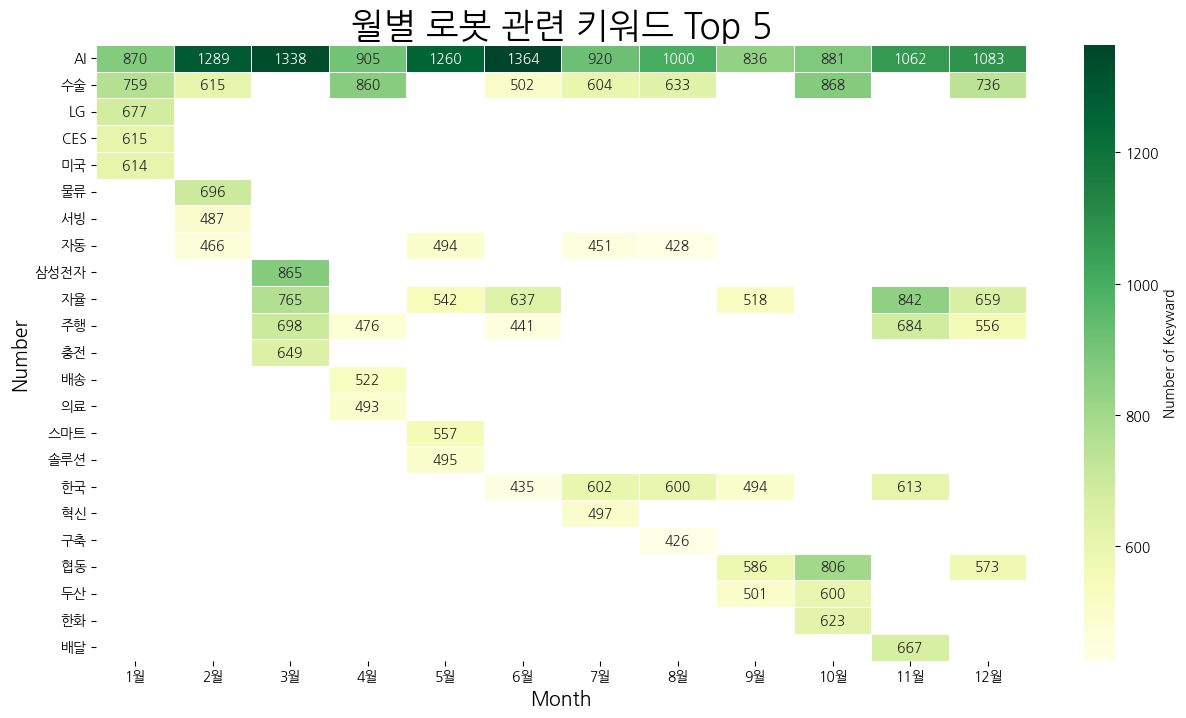

In [6]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.heatmap(monthly_topic, cmap = "YlGn", annot = True, linewidths=.5,fmt = ".0f", cbar_kws = {"label":"Number of Keyward"})
plt.title("월별 로봇 관련 키워드 Top 5", fontsize = 25)
plt.xlabel("Month", fontsize = 14)
plt.ylabel("Number", fontsize = 14)
plt.show()

## 가장 많이 언급된 상위 10개 키워드 리스트 생성

In [7]:
# 다음의 키워드 중 비슷한 분야는 제외하고 각자 독립적인 키워드를 선별

plt.close()
tags
keyward_list = []
keyward_news = []

# 로봇으로 뉴스 검색을 했기 때문에 로봇이 가장 많이 나와서 첫 번째는 제외
for tag in tags[1:11]:
    keyward_list.append(tag[0])
    keyward_news.append(tag[1])
top_10 = pd.DataFrame(data = keyward_news, index = keyward_list, columns=["number"])
top_10

,number
AI,12808
수술,7337
자율,6607
한국,5973
주행,5764
자동,5280
스마트,4771
협동,4658
물류,4559
세계,4549


/tmp/ipykernel_11152/2517441826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyward_news, y=keyward_list, orient="h", palette="muted")


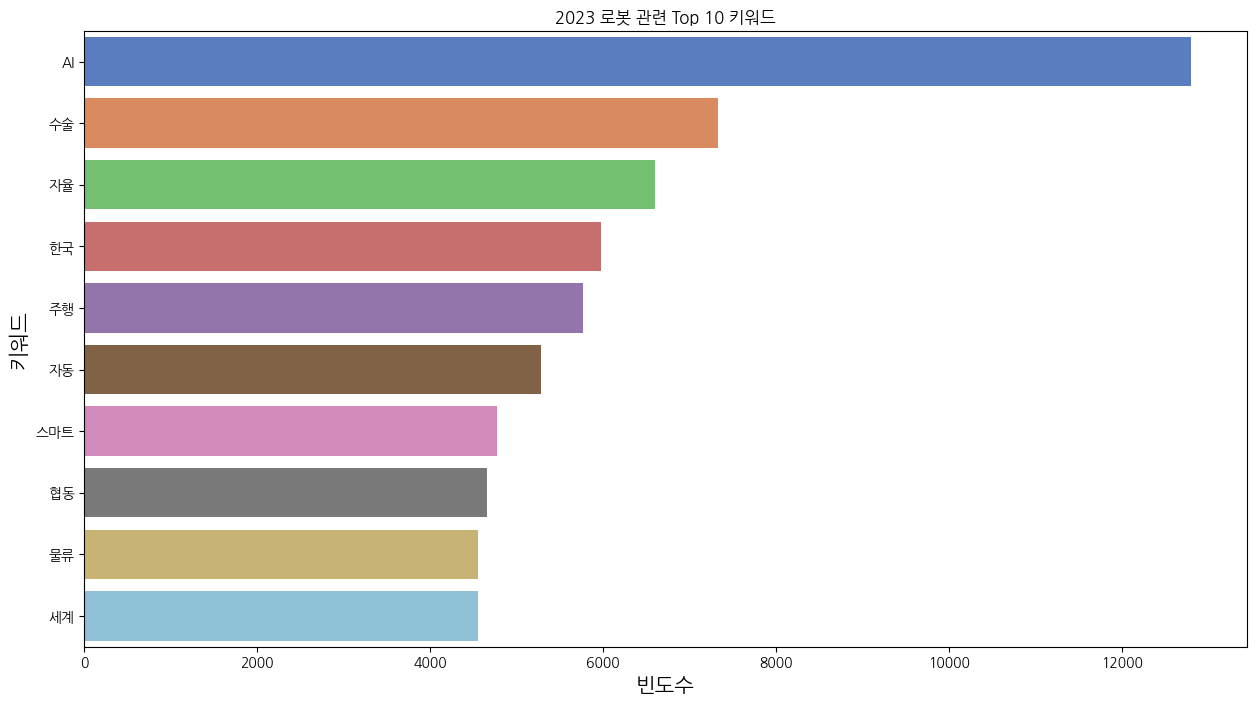

In [8]:
plt.figure(figsize=(15, 8))
sns.barplot(x=keyward_news, y=keyward_list, orient="h", palette="muted")
plt.title("2023 로봇 관련 Top 10 키워드")
plt.xlabel("빈도수", fontsize = 15)
plt.ylabel("키워드", fontsize = 15)
plt.show()

## 선정한 10개의 키워드가 각각 포함되어 있는 기사를 키워드 별로 분류(10개)

In [10]:
topic_index = []
for keyward in keyward_list:
    inner = []
    for idx, article in enumerate(df["tokenized_text"]):
        if keyward in article:
            inner.append(True)
        else:
            inner.append(False)
    topic_index.append(inner)
    
topic_distinct_list = []
for i, keyward in enumerate(keyward_list):
    topic_distinct_list.append(df.loc[topic_index[i]])
len(topic_distinct_list)

10

In [11]:
topic_distinct_list[2]

,date,title,text,tokenized_text,tokenized_title,hojae,date_day,date_month
8,2023-01-01 06:05:00,진격의 K기술 첨단기술로 질주한다 자율주행 3단계 G90 포문,후발주자 현대차그룹 올해 G90 출시로 3단계 상용화 배송로봇 등 다양한 분야에도 ...,"[발주자, 현대차, 그룹, 90, 출시, 단계, 상용, 배송, 로봇, 적용, 입법,...","[진격, 첨단, 질주, 자율, 주행, 단계, 90, 포문]",-1,2023-01-01,2023-01
10,2023-01-01 06:20:00,미리보는 CES 2023 모빌리티 신기술 경연장 빅테크 등 300 각축,전시관 면적 25 확대 기조연설 BMW 스텔란티스 CEO 참여 전기차 AI 첨단기...,"[전시관, 면적, 25, 확대, 기조연설, BMW, 스텔, 란티스, CEO, 참여,...","[미리, CES, 모빌리티, 경연장, 테크, 300, 각축]",1,2023-01-01,2023-01
15,2023-01-01 10:52:54,인사 동명대학교,1월 1일 자 보직교수 인사 산학협력단장 겸 재정총괄실장 박동우 반려동물대학장 겸...,"[보직, 교수, 인사, 산학, 협력, 단장, 재정, 총괄, 실장, 박동우, 반려, ...","[인사, 동명, 대학교]",1,2023-01-01,2023-01
16,2023-01-01 09:23:18,인사 동명대학교,부산 뉴시스 산학협력단장 겸 재정총괄실장 박동우 반려동물대학장 겸 반려동물보건학과...,"[부산, 뉴시스, 산학, 협력, 단장, 재정, 총괄, 실장, 박동우, 반려, 동물,...","[인사, 동명, 대학교]",-1,2023-01-01,2023-01
21,2023-01-01 18:02:01,ET단상 전통산업 도시 대구 첨단 미래산업으로 지형도 바뀐다,대구산업 섬유 내연기관 중심 자동차부품산업에서 미래첨단산업으로 재구성 AI 빅데이터...,"[대구, 섬유, 내연, 기관, 중심, 자동차, 부품, 미래, 첨단, 구성, AI, ...","[ET, 단상, 전통, 도시, 대구, 첨단, 미래산업, 지형, 바뀐다]",-1,2023-01-01,2023-01
...,...,...,...,...,...,...,...,...
9318,2023-12-28 12:39:01,고레로보틱스 건설자재 운반 로봇 CES 2024 혁신상,고레로보틱스가 내달 미국 라스베가스에서 열리는 세계 최대 IT 전시 CES 2024...,"[고레, 내달, 미국, 라스베가스, 열리, 세계, IT, 전시, CES, 2024,...","[고레, 건설, 자재, 운반, 로봇, CES, 2024, 신상]",1,2023-12-28,2023-12
9322,2023-12-27 13:16:01,집안일 챙기고 주인 마중까지 LG전자가 선보인 가사 로봇 도우미,스마트홈 AI 에이전트 CES 2024서 첫 공개 가사 해방 실현 가속 LG전자의 ...,"[스마트, AI, 에이전트, CES, 2024, 공개, 가사, 해방, 실현, 가속,...","[집안일, 챙기, 주인, 마중, LG, 선보인, 가사, 로봇, 도우미]",-1,2023-12-27,2023-12
9323,2023-12-29 16:44:01,로봇에 진심 LG전자 LG클로이의 미래형 버전 내놨다,스마트홈 AI 에이전트 LG전자 디지털데일리 옥송이기자 지난 2020년 B2B용 로...,"[스마트, AI, 에이전트, LG, 디지털, 데일리, 옥송, 2020, 로봇, LG...","[로봇, 진심, LG, LG, 클로이, 미래형, 버전, 내놨]",1,2023-12-29,2023-12
9324,2023-12-29 16:04:12,경산시 국민행복민원실 현판 제막 AI 방역 로봇 운행 등 인정,28일 조현일 경산시장 등 내빈들이 국민행복민원실 현판 제막행사를 하고 있다 경산시...,"[28, 조현일, 경산, 내빈, 국민, 행복, 민원실, 현판, 제막, 행사, 경산시...","[경산시, 국민, 행복, 민원실, 현판, 제막, AI, 방역, 로봇, 운행, 인정]",1,2023-12-29,2023-12


## 라벨링된 데이터의 점수를 일별로 합산

In [12]:
hojae_list = []
for data in topic_distinct_list:
    h = pd.pivot_table(data, index="date_day", values = "hojae", aggfunc = np.sum)
    # h["hojae_cumsum"] = np.cumsum(h["hojae"])
    hojae_list.append(h)

/tmp/ipykernel_11152/4040698500.py:3: FutureWarning: The provided callable <function sum at 0x7f8554115c60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  h = pd.pivot_table(data, index="date_day", values = "hojae", aggfunc = np.sum)
/tmp/ipykernel_11152/4040698500.py:3: FutureWarning: The provided callable <function sum at 0x7f8554115c60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  h = pd.pivot_table(data, index="date_day", values = "hojae", aggfunc = np.sum)
/tmp/ipykernel_11152/4040698500.py:3: FutureWarning: The provided callable <function sum at 0x7f8554115c60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" inst

In [13]:
hojae_list[1]

,hojae,hojae_cumsum
date_day,,
2023-01-01,2,2
2023-01-02,-4,-2
2023-01-03,2,0
2023-01-04,1,1
2023-01-05,-2,-1
...,...,...
2023-12-26,-5,-10
2023-12-27,1,-9
2023-12-28,1,-8


## 레인보우 로보틱스 예시 

In [14]:
import FinanceDataReader as fdr
import pandas as pd
    
class get_stock_data:
    def __init__(self, code, start, end):
        self.code = str(code)
        self.start = str(start)
        self.end = str(end)
        self.stock = fdr.DataReader(self.code, self.start, self.end)
        
    def get_data(self):
        # 지정한 종목코드의 주가 데이터
        return self.stock
    
    def get_diff(self):
        # 이전 행과 현재 행 비교(증감 추이 분석)
        return self.stock['Close'].diff() 

    def get_pct(self):
    # 증감 추이 퍼센티지
        return self.stock['Close'].pct_change()
    
    def count_bull(self):
        a1 = self.stock["Close"].pct_change() < 0
        return a1.sum()
        
    def count_bear(self):
        a1 = self.stock["Close"].pct_change() > 0
        return a1.sum()
    
rainbow_robotics = get_stock_data("277810", "2023", "2024")
rainbow_robotics.stock["Close"]

for i in range(len(hojae_list)):
    hojae_list[i] = pd.concat([hojae_list[i], rainbow_robotics.stock["Close"].diff()],axis=1, join='outer')
    hojae_list[i].dropna(inplace = True)

## 키워드마다 일별 호재, 악재 합산점수와 해당일 종가를 비교 회귀분석

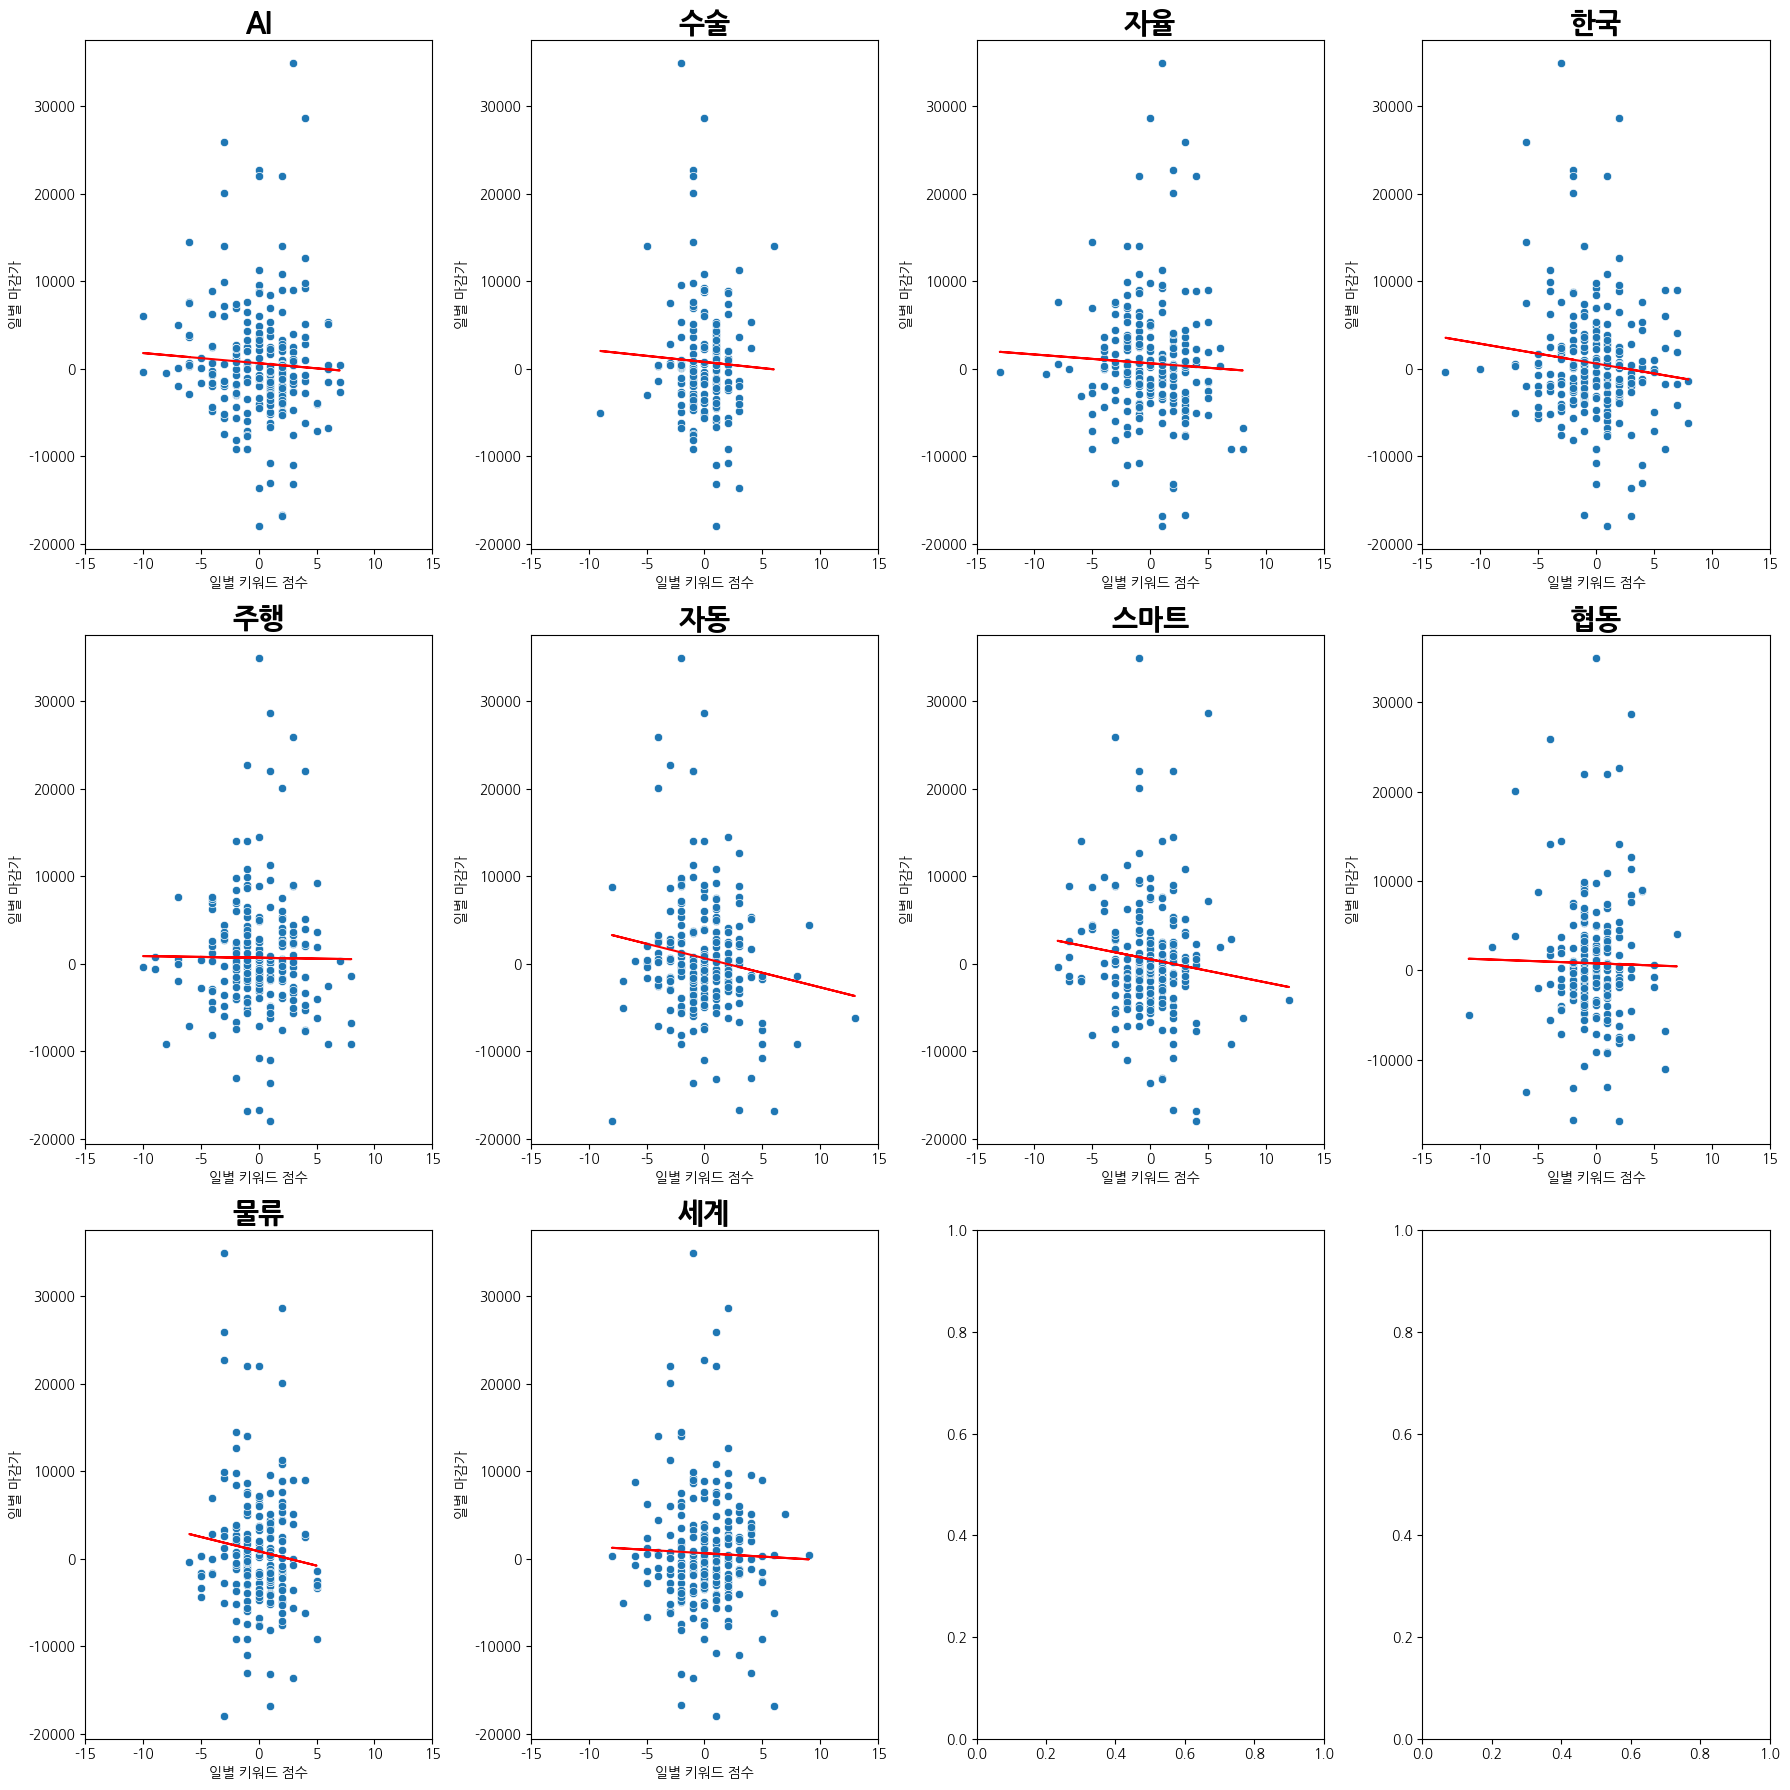

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np


def LR(hojae_list):
    coef_list = []
    for idx, element in enumerate(hojae_list):   
        X = np.array(element["hojae"])
        Y = np.array(element["Close"])
        
        # scatter 그리기
        plt.subplot(3, 4, idx+1)
        sns.scatterplot(x=element["hojae"], y=element["Close"])
        
        # m = 기울기, b = 절편
        m, b = np.polyfit(X, Y, 1)
        coef_list.append(m)
        
        # 직선 그리기 
        plt.plot(X, m*X + b, color="red")
        
        # 각 subplot에 제목 설정
        plt.title(f"{keyward_list[idx]}", fontdict={"size":20, "weight":"bold"})
        
        # x, y 축 라벨 설정
        plt.xlabel("일별 키워드 점수")
        plt.ylabel("일별 마감가")
        plt.xlim(-15, 15)

    plt.tight_layout()
    plt.show()
    
    return coef_list
    


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 18))
plt.subplots_adjust(left=0.1, bottom=0.1,  right=1, top=0.9, wspace=0.3, hspace=0.35)

coef_list = LR(hojae_list)
    

In [16]:
coef_list

[-116.60085322427099,
 -139.93399339933993,
 -101.03856484540601,
 -226.48815905567713,
 -19.434788890399748,
 -331.79486020387424,
 -264.29153762536663,
 -47.093511541968596,
 -327.82921810699577,
 -77.30413455348221]

In [47]:
month_list

[Period('2023-01', 'M'),
 Period('2023-02', 'M'),
 Period('2023-03', 'M'),
 Period('2023-04', 'M'),
 Period('2023-05', 'M'),
 Period('2023-06', 'M'),
 Period('2023-07', 'M'),
 Period('2023-08', 'M'),
 Period('2023-09', 'M'),
 Period('2023-10', 'M'),
 Period('2023-11', 'M'),
 Period('2023-12', 'M')]

In [55]:
listlist = ["2023-01-01", "2023-02-01", "2023-03-01", "2023-04-01", "2023-05-01", "2023-06-01", 
            "2023-07-01", "2023-08-01", "2023-09-01", "2023-10-01", "2023-11-01", "2023-12-01"]


# for month in month_list:
#     inner = []
#     monthly_data = topic_distinct_list[0].loc[(topic_distinct_list["date_month"]==month) & ("AI" in topic_distinct_list[0]["tokenized_text"])]
    
#     for i, row in monthly_data.iterrows():
#         inner.extend(row["tokenized_text"])
        
#     count = Counter(inner)
#     monthly_keyward.append(count.most_common())

key = []
for i in keyward_list:
    no_article = []
    for month in monthly_keyward:
        for keyward in month:
            if keyward[0] == i:
                no = keyward[1]
        no_article.append(no)
    key.append(no_article)
key
toto = pd.DataFrame({"date":listlist, "number":key[0]})

toto["date"] = pd.to_datetime(toto["date"])
toto.set_index("date", inplace=True)
toto


,number
date,
2023-01-01,870
2023-02-01,1289
2023-03-01,1338
2023-04-01,905
2023-05-01,1260
2023-06-01,1364
2023-07-01,920
2023-08-01,1000
2023-09-01,836


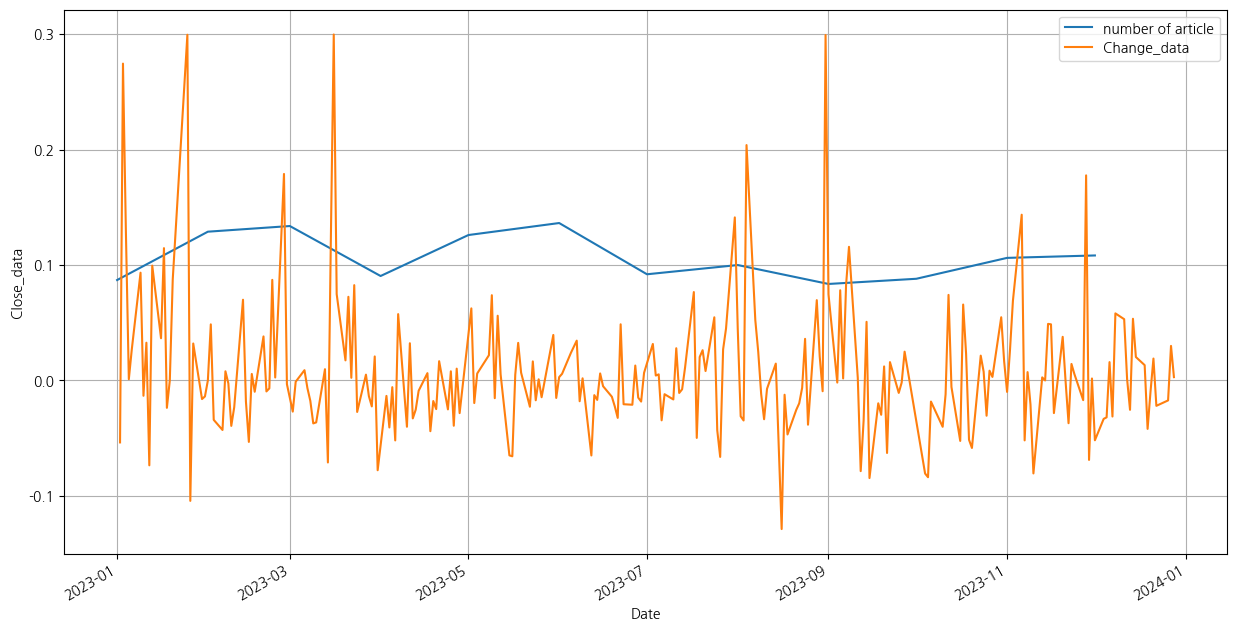

In [59]:
month_date = []
plt.figure(figsize=(15, 8))
plt.plot(toto["number"]/10000, label = "number of article")
rainbow_robotics.stock["Change"].plot(label="Change_data")
plt.ylabel("Close_data")
plt.legend()

plt.grid()


In [57]:
rainbow_robotics.stock

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-01-02,34650,34950,32000,32600,537307,-0.053701
2023-01-03,37600,42350,35700,41550,12696270,0.274540
2023-01-04,42550,47350,41550,46900,7817245,0.128761
2023-01-05,46050,50200,45650,46950,5728586,0.001066
2023-01-06,46500,53600,46450,48200,6654312,0.026624
...,...,...,...,...,...,...
2023-12-21,172000,184300,170100,177300,881801,0.018966
2023-12-22,179100,179300,172900,173400,309638,-0.021997
2023-12-26,173000,173000,167600,170400,282521,-0.017301


In [37]:
month_list = list(month_list)
month_list

[Period('2023-01', 'M'),
 Period('2023-02', 'M'),
 Period('2023-03', 'M'),
 Period('2023-04', 'M'),
 Period('2023-05', 'M'),
 Period('2023-06', 'M'),
 Period('2023-07', 'M'),
 Period('2023-08', 'M'),
 Period('2023-09', 'M'),
 Period('2023-10', 'M'),
 Period('2023-11', 'M'),
 Period('2023-12', 'M')]

In [23]:
topic_distinct_list[0]

,date,title,text,tokenized_text,tokenized_title,hojae,date_day,date_month
6,2023-01-01 08:01:01,페트병 모아 매출 수백억 김정빈 수퍼빈 대표 재활용도 본격화,쓰레기 잘 버리는 재미 주기 위해 창업 폐기물 수거 물류 소재화 세계 유일 202...,"[쓰레기, 버리, 재미, 주기, 창업, 폐기물, 수거, 물류, 소재, 세계, 유일,...","[페트병, 모아, 매출, 수백, 김정빈, 수퍼, 본격화]",1,2023-01-01,2023-01
7,2023-01-01 18:15:05,첫돌 지나면 스마트폰으로 놀이 학습 에듀테크 전성시대 2023 신년기획,Recession 시대의 해법 디지털 인류 알파세대 주목 알파세대 특징은 MZ 이어...,"[Recession, 시대, 해법, 디지털, 인류, 알파, 세대, 주목, 알파, 세...","[첫돌, 지나, 스마트폰, 놀이, 학습, 에듀, 테크, 전성시대, 신년, 기획]",-1,2023-01-01,2023-01
8,2023-01-01 06:05:00,진격의 K기술 첨단기술로 질주한다 자율주행 3단계 G90 포문,후발주자 현대차그룹 올해 G90 출시로 3단계 상용화 배송로봇 등 다양한 분야에도 ...,"[발주자, 현대차, 그룹, 90, 출시, 단계, 상용, 배송, 로봇, 적용, 입법,...","[진격, 첨단, 질주, 자율, 주행, 단계, 90, 포문]",-1,2023-01-01,2023-01
10,2023-01-01 06:20:00,미리보는 CES 2023 모빌리티 신기술 경연장 빅테크 등 300 각축,전시관 면적 25 확대 기조연설 BMW 스텔란티스 CEO 참여 전기차 AI 첨단기...,"[전시관, 면적, 25, 확대, 기조연설, BMW, 스텔, 란티스, CEO, 참여,...","[미리, CES, 모빌리티, 경연장, 테크, 300, 각축]",1,2023-01-01,2023-01
15,2023-01-01 10:52:54,인사 동명대학교,1월 1일 자 보직교수 인사 산학협력단장 겸 재정총괄실장 박동우 반려동물대학장 겸...,"[보직, 교수, 인사, 산학, 협력, 단장, 재정, 총괄, 실장, 박동우, 반려, ...","[인사, 동명, 대학교]",1,2023-01-01,2023-01
...,...,...,...,...,...,...,...,...
9321,2023-12-26 15:28:09,AI 로봇과 바둑 한판,서울 연합뉴스 류효림 기자 26일 오후 서울 영등포구 서울디지털동행플라자 서남센터...,"[연합뉴스, 효림, 26, 오후, 영등포구, 디지털, 동행, 플라자, 서남, 열린,...","[AI, 로봇, 바둑, 한판]",-1,2023-12-26,2023-12
9322,2023-12-27 13:16:01,집안일 챙기고 주인 마중까지 LG전자가 선보인 가사 로봇 도우미,스마트홈 AI 에이전트 CES 2024서 첫 공개 가사 해방 실현 가속 LG전자의 ...,"[스마트, AI, 에이전트, CES, 2024, 공개, 가사, 해방, 실현, 가속,...","[집안일, 챙기, 주인, 마중, LG, 선보인, 가사, 로봇, 도우미]",-1,2023-12-27,2023-12
9323,2023-12-29 16:44:01,로봇에 진심 LG전자 LG클로이의 미래형 버전 내놨다,스마트홈 AI 에이전트 LG전자 디지털데일리 옥송이기자 지난 2020년 B2B용 로...,"[스마트, AI, 에이전트, LG, 디지털, 데일리, 옥송, 2020, 로봇, LG...","[로봇, 진심, LG, LG, 클로이, 미래형, 버전, 내놨]",1,2023-12-29,2023-12
9324,2023-12-29 16:04:12,경산시 국민행복민원실 현판 제막 AI 방역 로봇 운행 등 인정,28일 조현일 경산시장 등 내빈들이 국민행복민원실 현판 제막행사를 하고 있다 경산시...,"[28, 조현일, 경산, 내빈, 국민, 행복, 민원실, 현판, 제막, 행사, 경산시...","[경산시, 국민, 행복, 민원실, 현판, 제막, AI, 방역, 로봇, 운행, 인정]",1,2023-12-29,2023-12


## 기울기를 이용하여 각 토픽별로 가중치를 곱해 호재, 악재 점수를 차등 분배

In [17]:
for i in range(len(coef_list)):
    hojae_list[i]["hojae"]=hojae_list[i]["hojae"]*coef_list[i]
    hojae_list[i]["hojae_cumsum"] = np.cumsum(hojae_list[i]["hojae"])

In [46]:
# type(hojae_list[0].index)
hojae_list[0]

,hojae,hojae_cumsum,Close
2023-01-03,-0.000000,-0.000000e+00,8950.0
2023-01-04,-699.605119,-6.996051e+02,5350.0
2023-01-05,583.004266,-1.166009e+02,50.0
2023-01-06,233.201706,1.166009e+02,1250.0
2023-01-09,-116.600853,-8.526513e-14,4500.0
...,...,...,...
2023-12-21,-0.000000,1.515811e+03,3300.0
2023-12-22,-233.201706,1.282609e+03,-3900.0
2023-12-26,-116.600853,1.166009e+03,-3000.0
2023-12-27,-699.605119,4.664034e+02,5100.0


## 종가와 거래량으로 비교

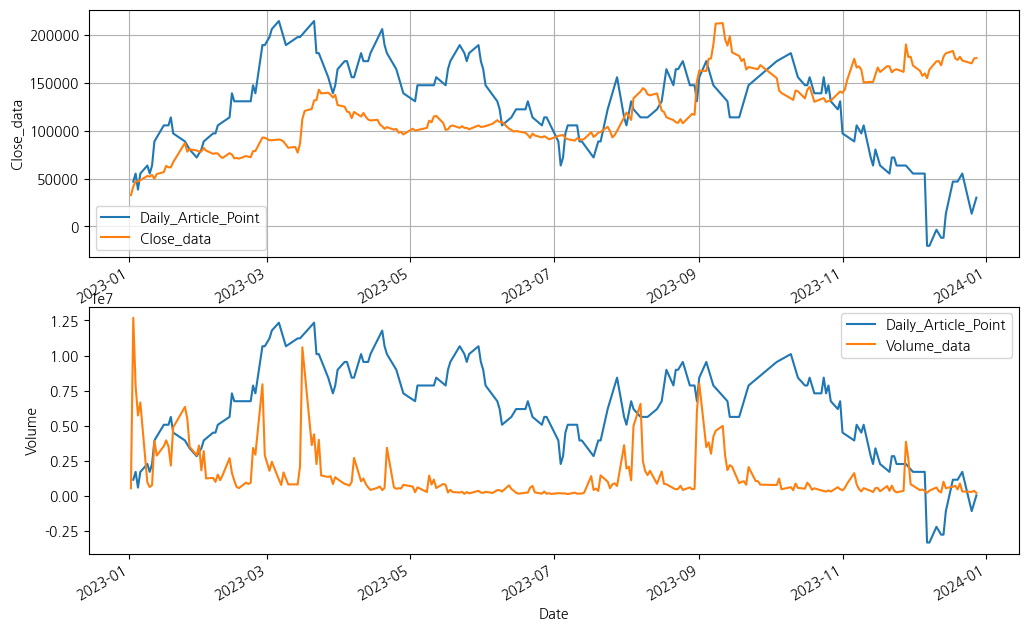

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(211)
plt.plot(hojae_list[1]["hojae_cumsum"]*(-60)+30000, label = "Daily_Article_Point")
rainbow_robotics.stock["Close"].plot(label="Close_data")
plt.ylabel("Close_data")
plt.legend()

plt.grid()

plt.subplot(212)
plt.plot(hojae_list[1]["hojae_cumsum"]*(-4000)+30000, label = "Daily_Article_Point")
rainbow_robotics.stock["Volume"].plot(label="Volume_data")
plt.ylabel("Volume")
plt.legend()
plt.show()